In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def grayscale(img):
    """Applies the Grayscale transform"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def canny(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def region_of_interest(img, vertices):
    """Applies an image mask.
    Only keeps the region of the image defined by the polygon formed from `vertices`.
    The rest of the image is set to black.
    """
    mask = np.zeros_like(img)   
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    """Draw lines on an image"""
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """Returns an image with hough lines drawn"""
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),
                            minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    """'img' is the output of the hough_lines(), An image with lines drawn on it.
    'initial_img' should be the image before any processing.
    The result image is computed as follows: initial_img * α + img * β + λ
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)


In [3]:
def lane_detection_pipeline(image):
    # Grayscale conversion
    gray = grayscale(image)
    
    # Gaussian blur
    blur_gray = gaussian_blur(gray, kernel_size=5)
    
    # Canny edge detection
    edges = canny(blur_gray, low_threshold=50, high_threshold=150)
    
    # Masking the region of interest
    imshape = image.shape
    vertices = np.array([[(100, imshape[0]), (450, 320), (490, 320), (imshape[1]-50, imshape[0])]], dtype=np.int32)
    masked_edges = region_of_interest(edges, vertices)
    
    # Hough Line Transform
    rho = 1
    theta = np.pi / 180
    threshold = 15
    min_line_len = 40
    max_line_gap = 20
    line_img = hough_lines(masked_edges, rho, theta, threshold, min_line_len, max_line_gap)
    
    # Draw the lines on the original image
    result = weighted_img(line_img, image, α=0.8, β=1., λ=0.)
    return result


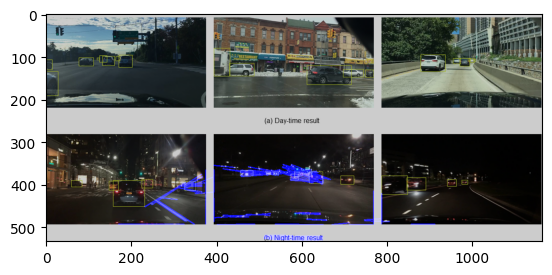

In [39]:
# Load image
image = cv2.imread(r"C:\Users\valid\Desktop\Final_project\CNN_code\YOLOP_detection.png")
result = lane_detection_pipeline(image)

# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()
